# BEER RECOMMENDATION SYSTEM



In [159]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
ratings = pd.read_csv('beer_data.csv')

# Data preparation

In [160]:
ratings.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [161]:
ratings.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


In [162]:
ratings.shape

(475984, 3)

In [163]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [164]:
ratings.isnull().sum()

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

In [165]:
# dropping rows with null value in the reviewer name column

ratings = ratings.dropna()

In [166]:
# dropping entries where the same user has reviewed the same beer twice

ratings = ratings.drop_duplicates(['beer_beerid','review_profilename'],keep= 'last')

In [167]:
ratings.count()

beer_beerid           474462
review_profilename    474462
review_overall        474462
dtype: int64

In [168]:
ratings.beer_beerid.value_counts()

2093     977
412      966
1904     902
1093     840
92       812
4083     798
276      788
7971     778
88       755
1013     750
34       743
17112    741
11757    721
2671     712
695      704
6108     703
1005     703
680      702
754      690
1160     685
104      684
1708     681
645      678
355      674
131      655
73       651
571      616
30420    612
2512     603
731      588
        ... 
37242      1
45438      1
47487      1
66120      1
76365      1
17122      1
27237      1
23265      1
72011      1
39035      1
44914      1
63607      1
38773      1
65400      1
61306      1
59259      1
57212      1
55165      1
13036      1
73804      1
746        1
22627      1
30823      1
25318      1
6251       1
31461      1
53362      1
57460      1
42666      1
69794      1
Name: beer_beerid, Length: 40304, dtype: int64

In [169]:
# average of number of times an item is reviewed

ratings.beer_beerid.value_counts().mean()

11.772082175466455

In [170]:
# selecting N as the mean of number of reviews per beerID and removing the rows with reviews < 4N

counts = ratings['beer_beerid'].value_counts()
ratings = ratings[~ratings['beer_beerid'].isin(counts[counts < 48].index)]


# Data Exploration

In [171]:
# unique value of ratings provided by the reviewers

ratings["review_overall"].unique()

array([3. , 4. , 2.5, 3.5, 5. , 4.5, 2. , 1.5, 1. ])

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

3.879990231140581

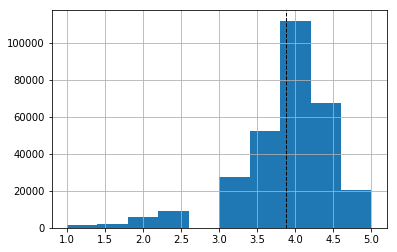

In [173]:
# average beer rating

ratings.review_overall.hist()
plt.axvline(ratings.review_overall.mean(), color='k', linestyle='dashed', linewidth=1)
ratings.review_overall.mean()



140.72928436911488

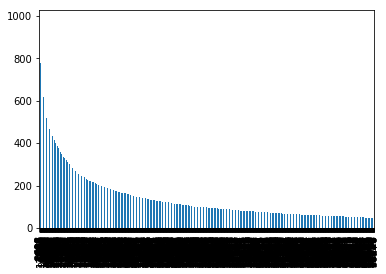

In [174]:
# The average number of ratings given to the beers

ratings['beer_beerid'].value_counts().plot('bar')
ratings['beer_beerid'].value_counts().mean()


15.284771937001432

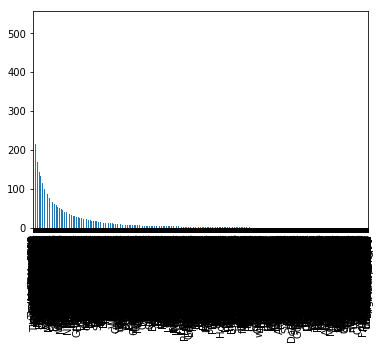

In [175]:
# The average number of ratings given by the reviewers

ratings['review_profilename'].value_counts().plot('bar')
ratings['review_profilename'].value_counts().mean()

3.947922964984088

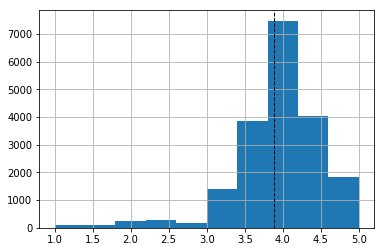

In [274]:
# average user rating

user_rating = ratings.groupby(['review_profilename']).mean()
user_rating.review_overall.hist()
plt.axvline(ratings.review_overall.mean(), color='k', linestyle='dashed', linewidth=1)
user_rating.review_overall.mean()

# Recommendation Models

In [178]:
# divide  data into training and testing dataset.

from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [179]:
print(train.shape)
print(test.shape)

(209236, 3)
(89673, 3)


In [180]:
# pivot ratings into beer features
ratings_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [181]:
ratings_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
dummy_train = train.copy()
dummy_test = test.copy()

In [183]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [186]:
# The beer not rated by reviewer is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The beer not rated by reviewer is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [187]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0tt0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [188]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User based similarity

In [191]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
reviewer_correlation = 1 - pairwise_distances(ratings_beer_features, metric='cosine')
reviewer_correlation[np.isnan(reviewer_correlation)] = 0
print(reviewer_correlation)

[[1.         0.         0.04668801 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.04668801 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [192]:
reviewer_correlation.shape

(17200, 17200)

In [194]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

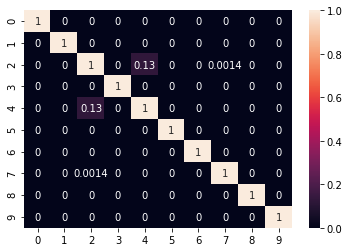

In [285]:
# Similarity between first 10 users

sns.heatmap(reviewer_correlation[:10,:10], annot=True)

In [195]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
mean = np.nanmean(beer_features, axis=1)
ratings_subtracted = (beer_features.T-mean).T

In [197]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
reviewer_correlation = 1 - pairwise_distances(ratings_subtracted.fillna(0), metric='cosine')
reviewer_correlation[np.isnan(reviewer_correlation)] = 0
print(reviewer_correlation)

[[ 1.          0.         -0.02187457 ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ...  0.          0.
   0.        ]
 [-0.02187457  0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [199]:
reviewer_correlation[reviewer_correlation<0]=0
reviewer_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [200]:
reviewer_predicted_ratings = np.dot(reviewer_correlation, beer_features.fillna(0))
reviewer_predicted_ratings

array([[1.28904111, 2.41818571, 1.84428248, ..., 1.45765243, 2.84975621,
        1.59958873],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.00757968, 4.3482838 , 3.29748275, ..., 1.72726126, 7.9452489 ,
        2.61297392],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.78219828, 7.24036843, 1.71641552, ..., 0.72638226, 0.41482858,
        0.68218792]])

In [201]:
reviewer_predicted_ratings.shape

(17200, 2124)

In [202]:
reviewer_final_rating = np.multiply(reviewer_predicted_ratings,dummy_train)
reviewer_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.289041,2.418186,1.844282,3.186076,0.417083,0.832350,3.105013,2.085949,6.685549,2.843880,...,5.347223,1.233964,0.380392,0.937252,1.671377,0.810160,0.645346,1.457652,2.849756,1.599589
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,2.007580,4.348284,3.297483,4.988146,0.554884,1.587854,4.239234,2.866034,8.066017,2.798548,...,9.319196,2.888352,2.360774,2.071920,1.968182,0.809491,1.141270,1.727261,7.945249,2.612974
0beerguy0,0.711701,4.143701,0.934994,2.631418,2.780314,1.346810,3.087409,1.889050,6.094440,6.051779,...,2.335921,0.488604,0.174478,1.495563,0.546381,0.181754,0.146801,0.183485,1.259391,0.581703
0tt0,2.841402,6.831803,3.335487,5.649180,0.613664,1.072470,4.360665,2.073863,10.738454,4.079393,...,8.313994,1.840379,1.750440,1.323888,1.506147,1.107347,1.283229,1.150269,4.700614,1.552547


# Top 5 beer recommended to reviewers on user-based model


In [234]:
reviewer_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
2093    36.420441
412     35.799286
4083    32.918538
34      31.387556
1093    31.134106
Name: cokes, dtype: float64

In [235]:
reviewer_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
1093    35.841538
2093    33.722149
412     31.349960
7971    31.338208
88      30.486936
Name: genog, dtype: float64

In [236]:
reviewer_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
412     60.393871
2093    58.418540
104     56.782378
276     52.951019
355     51.283985
Name: giblet, dtype: float64

# Item based Similarity

In [237]:
beer_features = train.pivot(
   index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,01Ryan10,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,1050Sudz,108Dragons,...,zuccard,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
mean = np.nanmean(beer_features, axis=1)
ratings_subtracted = (beer_features.T-mean).T

In [239]:
ratings_subtracted.head()

review_profilename,0110x011,01Ryan10,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,1050Sudz,108Dragons,...,zuccard,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(ratings_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.01812949 -0.01095767 ...  0.          0.01474879
   0.01076198]
 [ 0.01812949  1.          0.02132977 ... -0.01277325  0.
  -0.03532661]
 [-0.01095767  0.02132977  1.         ...  0.00163984  0.00202613
   0.02078305]
 ...
 [ 0.         -0.01277325  0.00163984 ...  1.         -0.01000626
   0.02030034]
 [ 0.01474879  0.          0.00202613 ... -0.01000626  1.
  -0.01187371]
 [ 0.01076198 -0.03532661  0.02078305 ...  0.02030034 -0.01187371
   1.        ]]


In [241]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.01812949, 0.        , ..., 0.        , 0.01474879,
        0.01076198],
       [0.01812949, 1.        , 0.02132977, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02132977, 1.        , ..., 0.00163984, 0.00202613,
        0.02078305],
       ...,
       [0.        , 0.        , 0.00163984, ..., 1.        , 0.        ,
        0.02030034],
       [0.01474879, 0.        , 0.00202613, ..., 0.        , 1.        ,
        0.        ],
       [0.01076198, 0.        , 0.02078305, ..., 0.02030034, 0.        ,
        1.        ]])

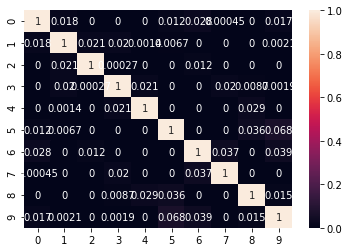

In [286]:
# Similarity between first 10 beers

sns.heatmap(item_correlation[:10,:10], annot=True)

In [242]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.537665  , 0.61283316, 0.60240235, ..., 0.72054753, 0.55933731,
        0.24821848],
       [0.        , 0.1281841 , 0.0251592 , ..., 0.10379119, 0.01938422,
        0.        ],
       [0.97476134, 0.27590843, 0.53025303, ..., 0.1282762 , 0.56966477,
        0.76477814],
       ...,
       [0.03113302, 0.03485265, 0.        , ..., 0.04320834, 0.06075981,
        0.07024057],
       [0.28211434, 0.        , 0.19014677, ..., 0.        , 0.05148601,
        0.04885843],
       [0.05312464, 0.19126127, 0.13558978, ..., 0.        , 0.03254898,
        0.02756265]])

In [243]:
item_predicted_ratings.shape

(17200, 2124)

In [244]:
dummy_train.shape

(17200, 2124)

In [245]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.537665,0.612833,0.602402,0.607275,1.136558,0.525133,0.954700,0.501209,0.819977,0.608580,...,0.865508,0.438972,0.225687,0.430069,0.424717,0.841781,0.845679,0.720548,0.559337,0.248218
01Ryan10,0.000000,0.128184,0.025159,0.000000,0.000000,0.000000,0.193798,0.080117,0.023768,0.058354,...,0.001742,0.012330,0.000000,0.000000,0.000000,0.183224,0.000000,0.103791,0.019384,0.000000
05Harley,0.974761,0.275908,0.530253,0.691146,0.579047,0.509037,0.430181,0.598110,0.555711,0.548043,...,1.112904,1.004670,0.164907,0.674709,0.699527,0.516026,0.938487,0.128276,0.569665,0.764778
0beerguy0,0.019803,0.145948,0.000000,0.111700,0.154217,0.190230,0.016649,0.004894,0.044950,0.142329,...,0.012719,0.011650,0.017198,0.000000,0.035544,0.000000,0.080550,0.000000,0.056413,0.025662
0tt0,0.373222,0.146340,0.189348,0.436842,0.178572,0.283715,0.270686,0.441849,0.377757,0.347293,...,0.174616,0.424528,0.084574,0.457240,0.126355,0.353972,0.598910,0.209913,0.287394,0.261894


# Top 5 beer recommended to reviewers on item-based model


In [246]:
item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
9135    13.330922
8116    11.218213
54      11.045167
2219    10.965673
356     10.954219
Name: cokes, dtype: float64

In [248]:
item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
13825    5.099968
38426    4.732577
15617    4.627367
2766     4.389441
13906    4.093413
Name: genog, dtype: float64

In [249]:
item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
2219     4.033106
3711     3.981276
385      3.873261
9135     3.744310
32212    3.714097
Name: giblet, dtype: float64

# Comparing the performance

USING USER SIMILARITY

In [251]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_ratings_subtracted = (test_beer_features.T-mean).T

# Reviewer Similarity Matrix
test_reviewer_correlation = 1 - pairwise_distances(test_ratings_subtracted.fillna(0), metric='cosine')
test_reviewer_correlation[np.isnan(test_reviewer_correlation)] = 0
print(test_reviewer_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [252]:
test_reviewer_correlation[test_reviewer_correlation<0]=0
test_reviewer_predicted_ratings = np.dot(test_reviewer_correlation, test_beer_features.fillna(0))
test_reviewer_predicted_ratings

array([[0.10034662, 0.33126791, 0.40644818, ..., 0.28616711, 0.53286659,
        0.48529079],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85881152, 0.65787297, 0.60266945, ..., 0.70710678, 1.45039787,
        0.06738667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [253]:
test_reviewer_final_rating = np.multiply(test_reviewer_predicted_ratings,dummy_test)

In [254]:
test_reviewer_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_reviewer_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [256]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [257]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [258]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.9814598862310155


USING ITEM SIMILARITY

In [267]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_ratings_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_ratings_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [268]:
test_item_correlation.shape

(2124, 2124)

In [269]:
test_beer_features.shape

(2124, 12476)

In [270]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [272]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [273]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.9542393134392202


* We can see that the rmse value for UBCF is 1.98 whereas the rmse value for IBCF is 1.95 hence we can conclude that here IBCF performs better than UBCF